# Single Perceptron Neural Networks for Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# A function to create a dataset.
from sklearn.datasets import make_regression
# A library for data manipulation and analysis.
import pandas as pd
# Some functions defined specifically for this notebook.
import nn_utils

# Output of plotting commands is displayed inline within the Jupyter notebook.
%matplotlib inline 

# Set a seed so that the results are consistent.
np.random.seed(3) 

## Simple Linear Regression

**Linear regression** is a linear approach for modelling the relationship between a scalar response (**dependent variable**) and one or more explanatory variables (**independent variables**). The case of one independent variable is called **simple linear regression**; for more than one, it is called **multiple linear regression**. 

### Simple Linear Regression Model

Simple linear regression model can be written as

$$\hat{y} = wx + b,\tag{1}$$

where $\hat{y}$ is a prediction of dependent variable $y$ based on independent variable $x$ using a line equation with the slope $w$ and intercept $b$. 

Given a set of training data points $(x_1, y_1)$, ..., $(x_m, y_m)$, the aim is to find the "best" fitting line - such parameters $w$ and $b$ that the differences between original values $y_i$ and predicted values $\hat{y}_i = wx_i + b$ are minimum.

### Neural Network Model with a Single Perceptron and One Input Node

The simplest neural network model has only one **perceptron**. It takes some inputs and calculates the output value.

The smallest construction block of neural networks is called a **node**. Some nodes store numbers from the input and others store the calculated values. **Input nodes** (here there is only one input node $x$) contain the input to the network which consists of our data. These nodes are set as an **input layer** of the network.

**Weight** ($w$) and **bias** ($b$) are the parameters which will get updated when **training** the model. They are initialized to some random value or set to 0 and updated as the training progresses. The bias is analogous to a weight independent of any input node. It makes the model more flexible.

The perceptron output calculation is straightforward: first compute the product of $x$ and weight $w$ and the add the bias:

$$z = w x + b\tag{2}$$

The **output layer** of the single perceptron has only one node $\hat{y} = z$.

If we have $m$ training examples, vector operations will allow us to perform the calculations simultaneously for all elements. Scalar multiplication of $X$ ($1 \times m$) by a scalar $w$, adding $b$, is broadcasted to the vector of size ($1 \times m$):

This set of calculations is called **forward propagation**.

Now, we can compare the resulting vector of the predictions $\hat{Y}$ ($1 \times m$) with the original vector of data $Y$. This can be done with the so called **cost function** that measures how close our vector of predictions is to the training data. It evaluates how well the parameters $w$ and $b$ work to solve the problem. MSE cost function.

$$\mathcal{L}\left(w, b\right)  = \frac{1}{2m}\sum_{i=1}^{m} \left(\hat{y}^{(i)} - y^{(i)}\right)^2.\tag{5}$$

**Backward propagation** is done iteratively: update the parameters with a small change and repeat the process.

The general **methodology** to build a neural network is to:
1. Define the neural network structure ( # of input units,  # of hidden units, etc). 
2. Initialize the model's parameters
3. Loop:
    - Implement forward propagation (calculate the perceptron output),
    - Implement backward propagation (to get the required corrections for the parameters),
    - Update parameters.
4. Make predictions.

### Dataset

The following code will create $m=30$ data points $(x_1, y_1)$, ..., $(x_m, y_m)$ and save them in `NumPy` arrays `X` and `Y` of a shape $(1 \times m)$.

In [2]:
m = 30

X, Y = make_regression(n_samples=m, n_features=1, noise=20, random_state=1)

X = X.reshape((1, m))
Y = Y.reshape((1, m))

print('Training dataset X:')
print(X)
print('Training dataset Y')
print(Y)

Training dataset X:
[[ 0.3190391  -1.07296862  0.86540763 -0.17242821  1.14472371  0.50249434
  -2.3015387  -0.68372786 -0.38405435 -0.87785842 -2.06014071 -1.10061918
  -1.09989127  1.13376944  1.74481176 -0.12289023 -0.93576943  1.62434536
   1.46210794  0.90159072 -0.7612069   0.53035547 -0.52817175 -0.26788808
   0.58281521  0.04221375  0.90085595 -0.24937038 -0.61175641 -0.3224172 ]]
Training dataset Y
[[ -3.01854669 -65.65047675  26.96755728   8.70562603  57.94332628
   -0.69293498 -78.66594473 -12.73881492 -13.26721663 -24.80488085
  -74.24484385 -39.99533724 -22.70174437  73.46766345  55.7257405
   23.80417646 -13.45481508  25.57952246  75.91238321  50.91155323
  -43.7191551   -1.7025559  -16.44931235 -33.54041234  20.4505961
   18.35949302  37.69029586  -1.04801683  -4.47915933 -20.89431647]]


Plot the dataset:

Text(0, 0.5, '$y$')

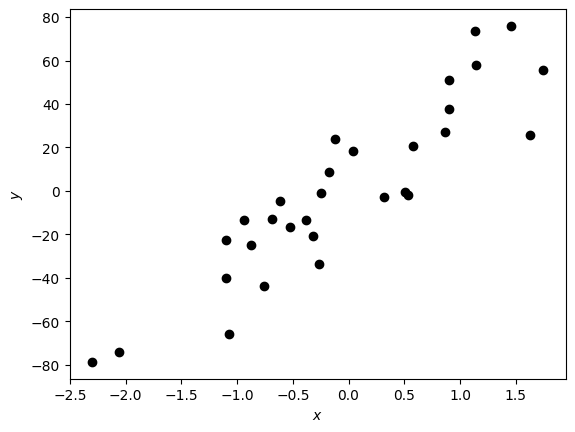

In [3]:
plt.scatter(X,  Y, c="black")

plt.xlabel("$x$")
plt.ylabel("$y$")

In [4]:
shape_X = X.shape
shape_Y = Y.shape
# Training set size.
m = X.size

print ('The shape of X: ' + str(shape_X))
print ('The shape of Y: ' + str(shape_Y))
print ('I have m = %d training examples!' % (m))

The shape of X: (1, 30)
The shape of Y: (1, 30)
I have m = 30 training examples!


## Implementation of the Neural Network Model for Linear Regression

In [5]:
def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_y -- the size of the output layer
    """
    # Size of input layer.
    n_x = X.shape[0]
    # Size of output layer.
    n_y = Y.shape[0]
    return (n_x, n_y)

In [6]:
(n_x, n_y) = layer_sizes(X, Y)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 1
The size of the output layer is: n_y = 1


### Initialize the Model's Parameters

In [7]:
def initialize_parameters(n_x, n_y):
    """
    Returns:
    params -- python dictionary containing our parameters:
                    W -- weight matrix of shape (n_y, n_x)
                    b -- bias value set as a vector of shape (n_y, 1)
    """
    W = np.random.randn(n_y, n_x) # weights initialized at random
    b = np.zeros((n_y, 1)) # biases init at 0
    assert (W.shape == (n_y, n_x))
    assert (b.shape == (n_y, 1))
    parameters = {"W": W, "b": b}
    return parameters

In [8]:
parameters = initialize_parameters(n_x, n_y)
print("W = " + str(parameters["W"]))
print("b = " + str(parameters["b"]))

W = [[1.78862847]]
b = [[0.]]


### Forward Prop

In [9]:
def forward_propagation(X, parameters, n_y):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing our parameters (output of initialization function)
    
    Returns:
    Y_hat -- The output of size (n_y, m)
    """
    W = parameters['W']
    b = parameters['b']
    
    # Implement Forward Propagation to calculate Z.
    Z = W @ X + b
    Y_hat = Z
    assert(Y_hat.shape == (n_y, X.shape[1]))
    return Y_hat

In [10]:
Y_hat = forward_propagation(X, parameters, n_y)

print(Y_hat)

[[ 0.57064241 -1.91914223  1.54789273 -0.30841     2.04748542  0.89877568
  -4.11659765 -1.22293512 -0.68693055 -1.57016256 -3.68482633 -1.9685988
  -1.96729684  2.02789231  3.12082    -0.21980496 -1.67374385  2.90535037
   2.61516789  1.61261083 -1.36151634  0.94860889 -0.94470303 -0.47915225
   1.04243989  0.07550471  1.6112966  -0.44603095 -1.09420494 -0.57668459]]


Define a cost function $(5)$ which will be used to train the model:

$$\mathcal{L}\left(w, b\right)  = \frac{1}{2m}\sum_{i=1}^{m} \left(\hat{y}^{(i)} - y^{(i)}\right)^2$$

In [11]:
def compute_cost(Y_hat, Y):
    """
    Computes the cost function as a sum of squares
    
    Arguments:
    Y_hat -- The output of the neural network of shape (n_y, number of examples)
    Y -- "true" labels vector of shape (n_y, number of examples)
    
    Returns:
    cost -- sum of squares scaled by 1/(2*number of examples)
    
    """
    # Number of examples.
    m = Y.shape[1]

    # Compute the cost function.
    cost = np.sum((Y_hat - Y)**2)/(2*m)
    
    return cost

In [12]:
print("cost = " + str(compute_cost(Y_hat, Y)))

cost = 727.4607928290292


In [13]:
# Backpropagation
parameters = nn_utils.train_nn(parameters, Y_hat, X, Y)

print("W = " + str(parameters["W"]))
print("b = " + str(parameters["b"]))

W = [[43.23297517]]
b = [[0.30662811]]


In [14]:
def nn_model(X, Y, num_iterations=10, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (n_x, number of examples)
    Y -- labels of shape (n_y, number of examples)
    num_iterations -- number of iterations in the loop
    print_cost -- if True, print the cost every iteration
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to make predictions.
    """
    
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[1]
    
    # Initialize parameters
    parameters = initialize_parameters(n_x, n_y)

    for i in range(0, num_iterations):
        # Forward propagation. Inputs: "X, parameters, n_y". Outputs: "Y_hat".
        Y_hat = forward_propagation(X, parameters, n_y)
        
        # Cost function. Inputs: "Y_hat, Y". Outputs: "cost".
        cost = compute_cost(Y_hat, Y)

        # Parameters update.
        parameters = nn_utils.train_nn(parameters, Y_hat, X, Y) 
        
        # Print the cost every iteration.
        if print_cost:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

In [15]:
parameters = nn_model(X, Y, num_iterations=15, print_cost=True)
print("W = " + str(parameters["W"]))
print("b = " + str(parameters["b"]))

W_simple = parameters["W"]
b_simple = parameters["b"]

Cost after iteration 0: 775.092989
Cost after iteration 1: 175.611083
Cost after iteration 2: 143.705189
Cost after iteration 3: 141.428272
Cost after iteration 4: 141.248310
Cost after iteration 5: 141.233693
Cost after iteration 6: 141.232497
Cost after iteration 7: 141.232399
Cost after iteration 8: 141.232391
Cost after iteration 9: 141.232391
Cost after iteration 10: 141.232391
Cost after iteration 11: 141.232391
Cost after iteration 12: 141.232391
Cost after iteration 13: 141.232391
Cost after iteration 14: 141.232391
W = [[35.71958208]]
b = [[2.2893077]]


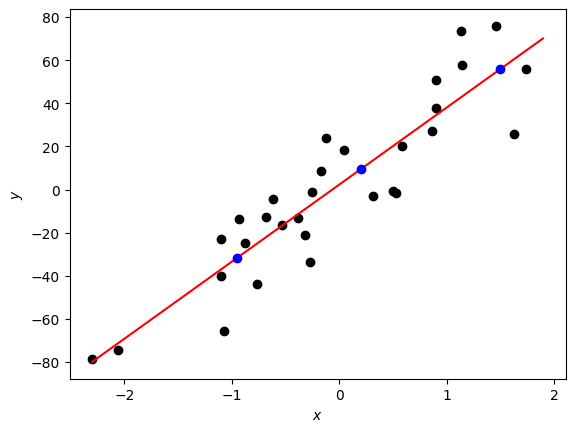

In [16]:
X_pred = np.array([-0.95, 0.2, 1.5])

fig, ax = plt.subplots()
plt.scatter(X, Y, color = "black")

plt.xlabel("$x$")
plt.ylabel("$y$")
    
X_line = np.arange(np.min(X[0,:]),np.max(X[0,:])*1.1, 0.1)
ax.plot(X_line, W_simple[0,0] * X_line + b_simple[0,0], "r")
ax.plot(X_pred, W_simple[0,0] * X_pred + b_simple[0,0], "bo")
plt.plot()
plt.show()

## Multiple Linear Regression

### Multipe Linear Regression Model

Multiple linear regression model with two independent variables $x_1$, $x_2$ can be written as

$$\hat{y} = w_1x_1 + w_2x_2 + b = Wx + b,\tag{6}$$

where $Wx$ is the dot product of the input vector $x = \begin{bmatrix} x_1 & x_2\end{bmatrix}$ and parameters vector $W = \begin{bmatrix} w_1 & w_2\end{bmatrix}$, scalar parameter $b$ is the intercept. 

### Neural Network Model with a Single Perceptron and Two Input Nodes

The perceptron output calculation for every training example $x^{(i)} = \begin{bmatrix} x_1^{(i)} & x_2^{(i)}\end{bmatrix}$ can be written with dot product:

$$z^{(i)} = w_1x_1^{(i)} + w_2x_2^{(i)} + b = Wx^{(i)} + b,\tag{7}$$

where weights are in the vector $W = \begin{bmatrix} w_1 & w_2\end{bmatrix}$ and bias $b$ is a scalar. The output layer will have the same single node $\hat{y}^{(i)} = z^{(i)}$.

Organise all training examples in a matrix $X$ of a shape ($2 \times m$), putting $x_1^{(i)}$ and $x_2^{(i)}$ into columns. Then matrix multiplication of $W$ ($1 \times 2$) and $X$ ($2 \times m$) will give a ($1 \times m$) vector

$$WX = 
\begin{bmatrix} w_1 & w_2\end{bmatrix} 
\begin{bmatrix} 
x_1^{(1)} & x_1^{(2)} & \dots & x_1^{(m)} \\ 
x_2^{(1)} & x_2^{(2)} & \dots & x_2^{(m)} \\ \end{bmatrix}
=\begin{bmatrix} 
w_1x_1^{(1)} + w_2x_2^{(1)} & 
w_1x_1^{(2)} + w_2x_2^{(2)} & \dots & 
w_1x_1^{(m)} + w_2x_2^{(m)}\end{bmatrix}.$$

$b$ is broadcasted to the vector of a size ($1 \times m$). These are the calculations to perform in the forward propagation step. Cost function will remain the same and the training is done with the same backprop algorithm.

In [31]:
df = pd.read_csv('data/house_prices_train.csv')

Select the required fields and save them in the variables `X_multi`, `Y_multi`:

In [32]:
X_multi = df[['GrLivArea', 'OverallQual']]
Y_multi = df['SalePrice']

In [34]:
print(f"X_multi:\n{X_multi}\n")
print(f"Y_multi:\n{Y_multi}\n")

X_multi:
      GrLivArea  OverallQual
0          1710            7
1          1262            6
2          1786            7
3          1717            7
4          2198            8
...         ...          ...
1455       1647            6
1456       2073            6
1457       2340            7
1458       1078            5
1459       1256            5

[1460 rows x 2 columns]

Y_multi:
0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64



**Normalization**: substract the mean value of the array from each of the elements in the array and divide them by standard deviation.

In [35]:
X_multi_norm = (X_multi - np.mean(X_multi, axis=0))/np.std(X_multi, axis=0)
Y_multi_norm = (Y_multi - np.mean(Y_multi, axis=0))/np.std(Y_multi, axis=0)

Convert results to the `NumPy` arrays, transpose `X_multi_norm` to get an array of a shape ($2 \times m$) and reshape `Y_multi_norm` to bring it to the shape ($1 \times m$):

In [36]:
X_multi_norm = np.array(X_multi_norm).T
Y_multi_norm = np.array(Y_multi_norm).reshape((1, len(Y_multi_norm)))

print ('The shape of X: ' + str(X_multi_norm.shape))
print ('The shape of Y: ' + str(Y_multi_norm.shape))
print ('I have m = %d training examples!' % (X_multi_norm.shape[1]))

The shape of X: (2, 1460)
The shape of Y: (1, 1460)
I have m = 1460 training examples!


In [37]:
parameters_multi = nn_model(X_multi_norm, Y_multi_norm, num_iterations=100, print_cost=True)
print("W = " + str(parameters_multi["W"]))
print("b = " + str(parameters_multi["b"]))
W_multi = parameters_multi["W"]
b_multi = parameters_multi["b"]

Cost after iteration 0: 1.285331
Cost after iteration 1: 1.060009
Cost after iteration 2: 0.896597
Cost after iteration 3: 0.767035
Cost after iteration 4: 0.660999
Cost after iteration 5: 0.573307
Cost after iteration 6: 0.500544
Cost after iteration 7: 0.440105
Cost after iteration 8: 0.389886
Cost after iteration 9: 0.348155
Cost after iteration 10: 0.313475
Cost after iteration 11: 0.284655
Cost after iteration 12: 0.260705
Cost after iteration 13: 0.240802
Cost after iteration 14: 0.224262
Cost after iteration 15: 0.210517
Cost after iteration 16: 0.199094
Cost after iteration 17: 0.189601
Cost after iteration 18: 0.181712
Cost after iteration 19: 0.175156
Cost after iteration 20: 0.169708
Cost after iteration 21: 0.165181
Cost after iteration 22: 0.161418
Cost after iteration 23: 0.158292
Cost after iteration 24: 0.155693
Cost after iteration 25: 0.153534
Cost after iteration 26: 0.151739
Cost after iteration 27: 0.150248
Cost after iteration 28: 0.149009
Cost after iteration 29:

Remember, that the initial datasets were normalized. To make the predictions, we need to normalize the original, calculate predictions with the obtained linear regression coefficients and then **denormalize** the result (perform the reverse process of normalization):

In [39]:
X_pred_multi = np.array([[1710, 7], [1200, 6], [2200, 8]]).T

# Normalize using the same mean and standard deviation of the original training array X_multi.
X_multi_mean = np.array(np.mean(X_multi, axis=0)).reshape((2,1))
X_multi_std = np.array(np.std(X_multi, axis=0)).reshape((2,1))
X_pred_multi_norm = (X_pred_multi - X_multi_mean)/ X_multi_std
# Make predictions.
Y_pred_multi_norm = np.matmul(W_multi, X_pred_multi_norm) + b_multi
# Denormalize using the same mean and standard deviation of the original training array Y_multi.
Y_pred_multi = Y_pred_multi_norm * np.std(Y_multi) + np.mean(Y_multi)

print(f"Ground living area, square feet:\n{X_pred_multi[0]}")
print(f"Rates of the overall quality of material and finish, 1-10:\n{X_pred_multi[1]}")
print(f"Predictions of sales price, $:\n{np.round(Y_pred_multi)}")

Ground living area, square feet:
[1710 1200 2200]
Rates of the overall quality of material and finish, 1-10:
[7 6 8]
Predictions of sales price, $:
[[221369. 160041. 281580.]]
